In [4]:
from __future__ import print_function, division     # Python 2/3 compatibility
from skimage import io                              # utilities to read and write images in various formats
import numpy as np                                  # array manipulation package
import matplotlib.pyplot as plt                      # plotting package
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 8)            # set default figure size
plt.rcParams['image.cmap'] = 'gray'                 # set default colormap to gray

# Assignment 4 : Image Restoration and Color Processing

The following programming assignment involves the task of image restoration in the spatial and frequency domain, as well as color image processing.

**Please, follow carefully the submission instructions given in the end of this notebook.** You are encouraged to seek information in other places than the course book and lecture material but remember **list all your sources under references**.

If you experience problems that you cannot solve using the course material or the Python documentation, or have any questions regarding the programming assignments, please do not hesitate to contact the course assistant by sending an e-mail at dip@unioulu.oulu.fi. You can also join in for the Q & A session (schedule is given on the course page in Moodle) for this assignment.

**Please, fill in your personal details below.**

# Personal details:

* **Name(s) and student ID(s): Marwa Bibi (SID# 2407704), Haseeb Ur Rehman (SID# 2315255)** 
* **Contact information: Marwa.Bibi@student.oulu.fi, Haseeb.Rehman@student.oulu.fi** 

# 1. Image enhancement in spatial domain

The gray-scale image `test_gauss_noise.jpg` contain different types of noise. Your task is to perform image enhancement in spatial domain so that the noise is reduced. Please note that you cannot to restore the original image (i. e. remove the noise completely). For instance, __[`scipy.ndimage`](https://docs.scipy.org/doc/scipy/reference/ndimage.html)__ and __[`scipy.signal`](https://docs.scipy.org/doc/scipy/reference/signal.html)__ packages provide useful tools for filtering the noise types.

### Additive Gaussian noise

The image `test_gauss_noise.jpg` suffers from additive Gaussian noise:

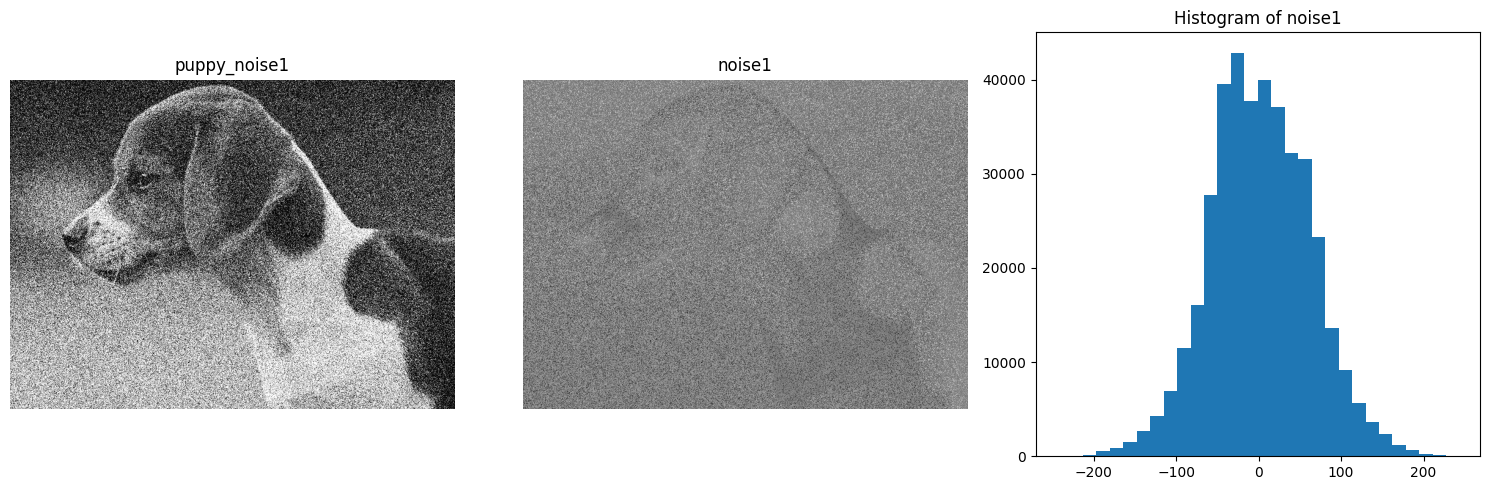

In [5]:
# read image the original 'test_noiseless.jpg' and its noisy version 'test_gauss_noise.jpg'
orig = io.imread('test_noiseless.jpg').astype('int32')
noisy1 = io.imread('test_gauss_noise.jpg')

# extract the additive noise from the noisy image by subtracting the original image from the noisy one
noise1 = noisy1.astype('int32') - orig

# display the noisy image, noise and histogram of the noise
fig, ax = plt.subplots(1, 3, figsize=(15,5))
ax[0].imshow(noisy1, vmin=0, vmax=255, cmap=plt.get_cmap('gray'))
ax[0].set_title('puppy_noise1')
ax[0].axis('off')
ax[1].imshow(noise1, cmap=plt.get_cmap('gray'))
ax[1].set_title('noise1')
ax[1].axis('off')
ax[2].hist(noise1.flatten(), bins=30, fc='black')
ax[2].set_title('Histogram of noise1')
fig.tight_layout()

**1.1. Perform image enhancement on the `test_gauss_noise.jpg` image using a `3x3` mean filter and compute the root mean squared error (RMSE) with the original image before and after filtering the noise. Print the RMSE values. Then, display the noisy, enhanced and original image in the same figure.**

Hint: You can perform the filtering by first constructing the `3x3` mean filter mask (`NumPy array`) and then convolving the image with it using e.g. __[`scipy.signal.convolve2d()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html)__ function. Please note the __[difference in (integer) division between Python versions 2 and 3](https://stackoverflow.com/questions/21316968/division-in-python-2-7-and-3-3)__.

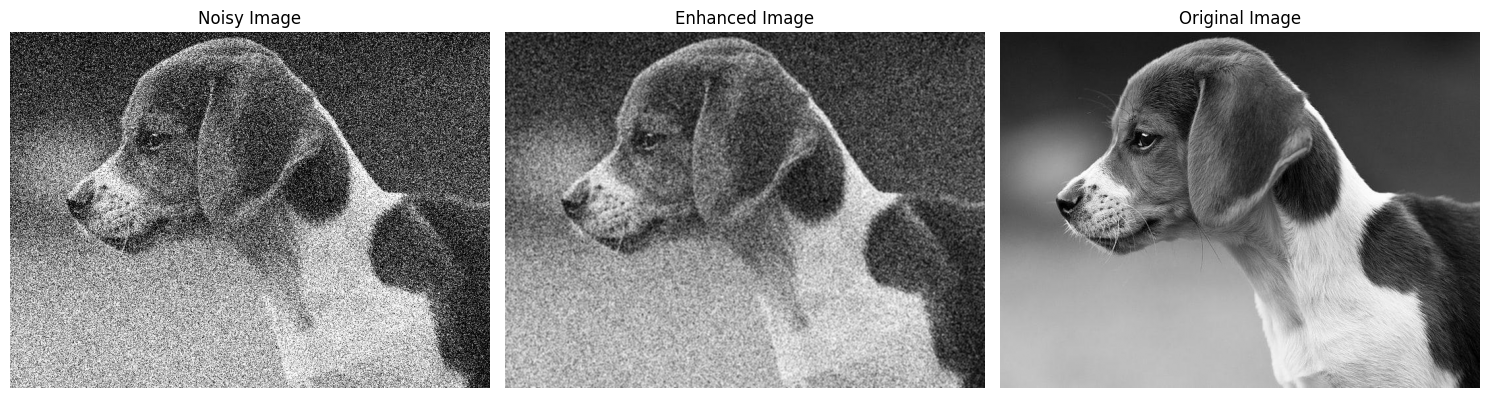

RMSE before enhancement: 60.63
RMSE after enhancement: 24.31


In [6]:
from scipy import signal

def compute_rmse(img1, img2):
    """Compute Root Mean Squared Error (RMSE) between two images."""
    img1 = img1.astype('float64')
    img2 = img2.astype('float64')
    return np.sqrt(np.mean((img1 - img2) ** 2))

# construct mean filter mask
mean_filter = np.ones((3, 3)) / 9

# convolve the noisy image with the constructed filter mask
enhanced_image_mean = signal.convolve2d(noisy1, mean_filter, mode='same', boundary='symm')

# display the noisy, enhanced and original images

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Noisy image
ax[0].imshow(noisy1, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Noisy Image')
ax[0].axis('off')

# Enhanced image
ax[1].imshow(enhanced_image_mean, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Enhanced Image')
ax[1].axis('off')

# Original image
ax[2].imshow(orig, cmap='gray', vmin=0, vmax=255)
ax[2].set_title('Original Image')
ax[2].axis('off')

plt.tight_layout()
plt.show()

# print RMSE before and after enhancement
rmse_before = compute_rmse(orig, noisy1)
rmse_after = compute_rmse(orig, enhanced_image_mean)


print(f"RMSE before enhancement: {rmse_before:.2f}")
print(f"RMSE after enhancement: {rmse_after:.2f}")

**1.2. Perform image enhancement on the `test_gauss_noise.jpg` image a `3x3` __[median filter](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.median_filter.html#scipy.ndimage.median_filter)__ and compute the RMSE with the original image before and after filtering the noise. Then, display the noisy, enhanced and original image in the same figure.**

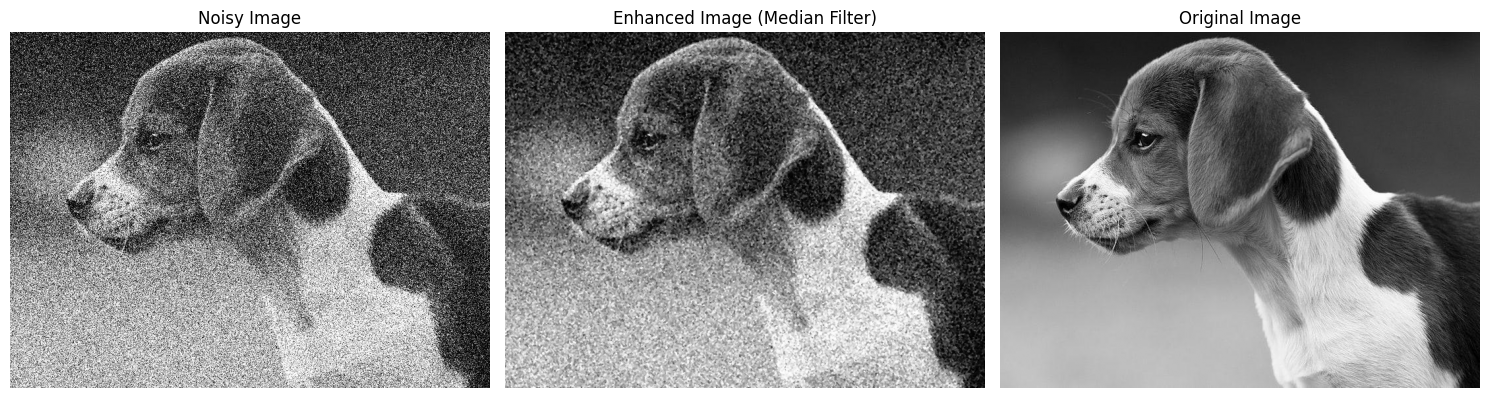

RMSE before enhancement: 60.63
RMSE after enhancement: 29.34


In [7]:
from scipy.ndimage import median_filter

# apply 3x3 median filter on the noisy image image
enhanced_image_median = median_filter(noisy1, size=3)

# display the noisy, enhanced and original images

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Noisy image
ax[0].imshow(noisy1, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Noisy Image')
ax[0].axis('off')

# Enhanced image (median filtered)
ax[1].imshow(enhanced_image_median, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Enhanced Image (Median Filter)')
ax[1].axis('off')

# Original image
ax[2].imshow(orig, cmap='gray', vmin=0, vmax=255)
ax[2].set_title('Original Image')
ax[2].axis('off')

plt.tight_layout()
plt.show()


# print RMSE before and after enhancement
rmse_before = compute_rmse(orig, noisy1)
rmse_after = compute_rmse(orig, enhanced_image_median)

print(f"RMSE before enhancement: {rmse_before:.2f}")
print(f"RMSE after enhancement: {rmse_after:.2f}")

**1.3. Perform image enhancement on the `test_gauss_noise.jpg` image using a `5x5` __[Wiener filter](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.wiener.html)__ and compute the RMSE with the original image before and after filtering the noise. Then, display the noisy, enhanced and original image in the same figure. Please note that you need to convert the input image into `float64` using `astype('float64')` before applying __[`scipy.signal.wiener()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.wiener.html)__ function!**

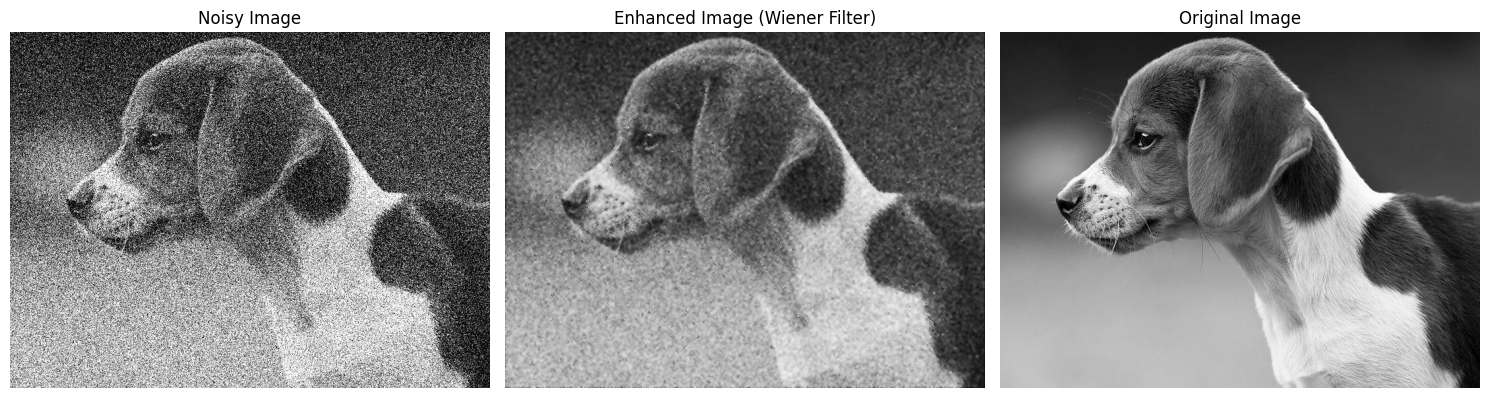

RMSE before enhancement: 60.63
RMSE after enhancement: 21.79


In [8]:
from scipy.signal import wiener

# apply 5x5 Wiener filter on the noisy image
# first convert the input image to float64 using 'astype('float64')'!

noisy_float = noisy1.astype('float64')

enhanced_image_wiener = wiener(noisy_float, mysize=5)

# display the noisy, enhanced and original images

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Noisy image
ax[0].imshow(noisy1, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Noisy Image')
ax[0].axis('off')

# Enhanced image (Wiener filtered)
ax[1].imshow(enhanced_image_wiener, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Enhanced Image (Wiener Filter)')
ax[1].axis('off')

# Original image
ax[2].imshow(orig, cmap='gray', vmin=0, vmax=255)
ax[2].set_title('Original Image')
ax[2].axis('off')

plt.tight_layout()
plt.show()


# print RMSE before and after enhancement

rmse_before = compute_rmse(orig, noisy1)
rmse_after = compute_rmse(orig, enhanced_image_wiener)

print(f"RMSE before enhancement: {rmse_before:.2f}")
print(f"RMSE after enhancement: {rmse_after:.2f}")

**1.4. Finally, display the three images obtained with mean, median and Wiener filters in the same figure.**

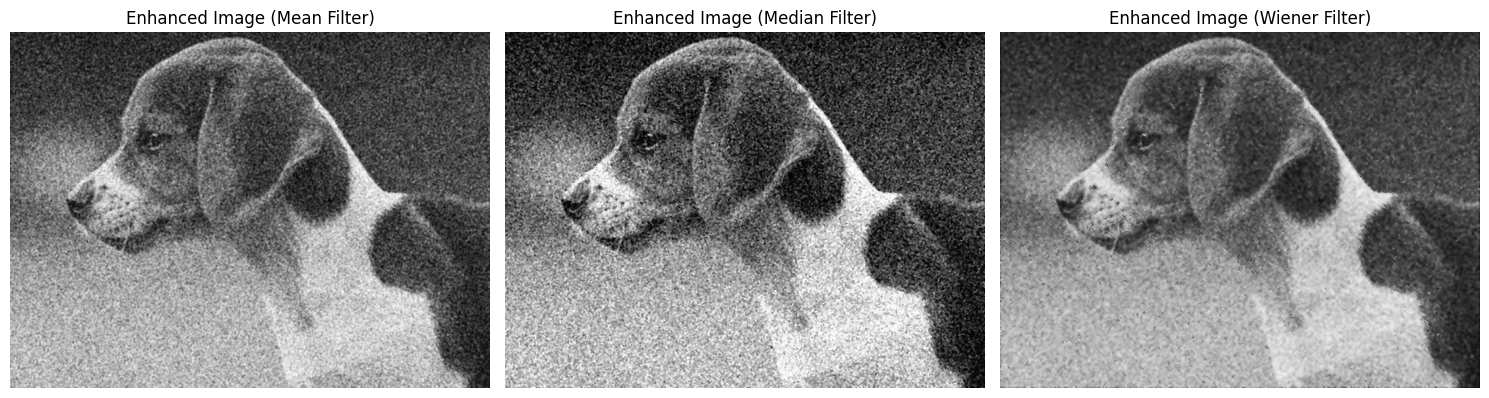

In [9]:
# display the mean, median and Wiener filtered images

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Noisy image
# ax.set_title('RMSE Values are in the title of each image')
ax[0].imshow(enhanced_image_mean, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Enhanced Image (Mean Filter)')
ax[0].axis('off')

ax[1].imshow(enhanced_image_median, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Enhanced Image (Median Filter)')
ax[1].axis('off')

# Enhanced image (Wiener filtered)
ax[2].imshow(enhanced_image_wiener, cmap='gray', vmin=0, vmax=255)
ax[2].set_title('Enhanced Image (Wiener Filter)')
ax[2].axis('off')


plt.tight_layout()
plt.show()

**Which method gave the best result? Why??**

`| Filter         | RMSE Before Enhancement | RMSE After Enhancement | Reduction in RMSE |



|----------------|--------------------------|-------------------------|-------------------|


| Mean Filter        | 60.63                                  | 24.31                    | 36.32            |


| Median Filter      | 60.63                                  | 29.34                    | 31.29            |


| Wiener Filter      | 60.63                                  | 21.79                    | 38.84            |

The Wiener filter gave the best result because it achieved the lowest RMSE (21.79) and the largest reduction in RMSE (38.84) . It is specifically designed for Gaussian noise, making it more effective at reducing noise while preserving image details compared to the mean and median filters.

Ref - 1`

# 2. Image enhancement in frequency domain

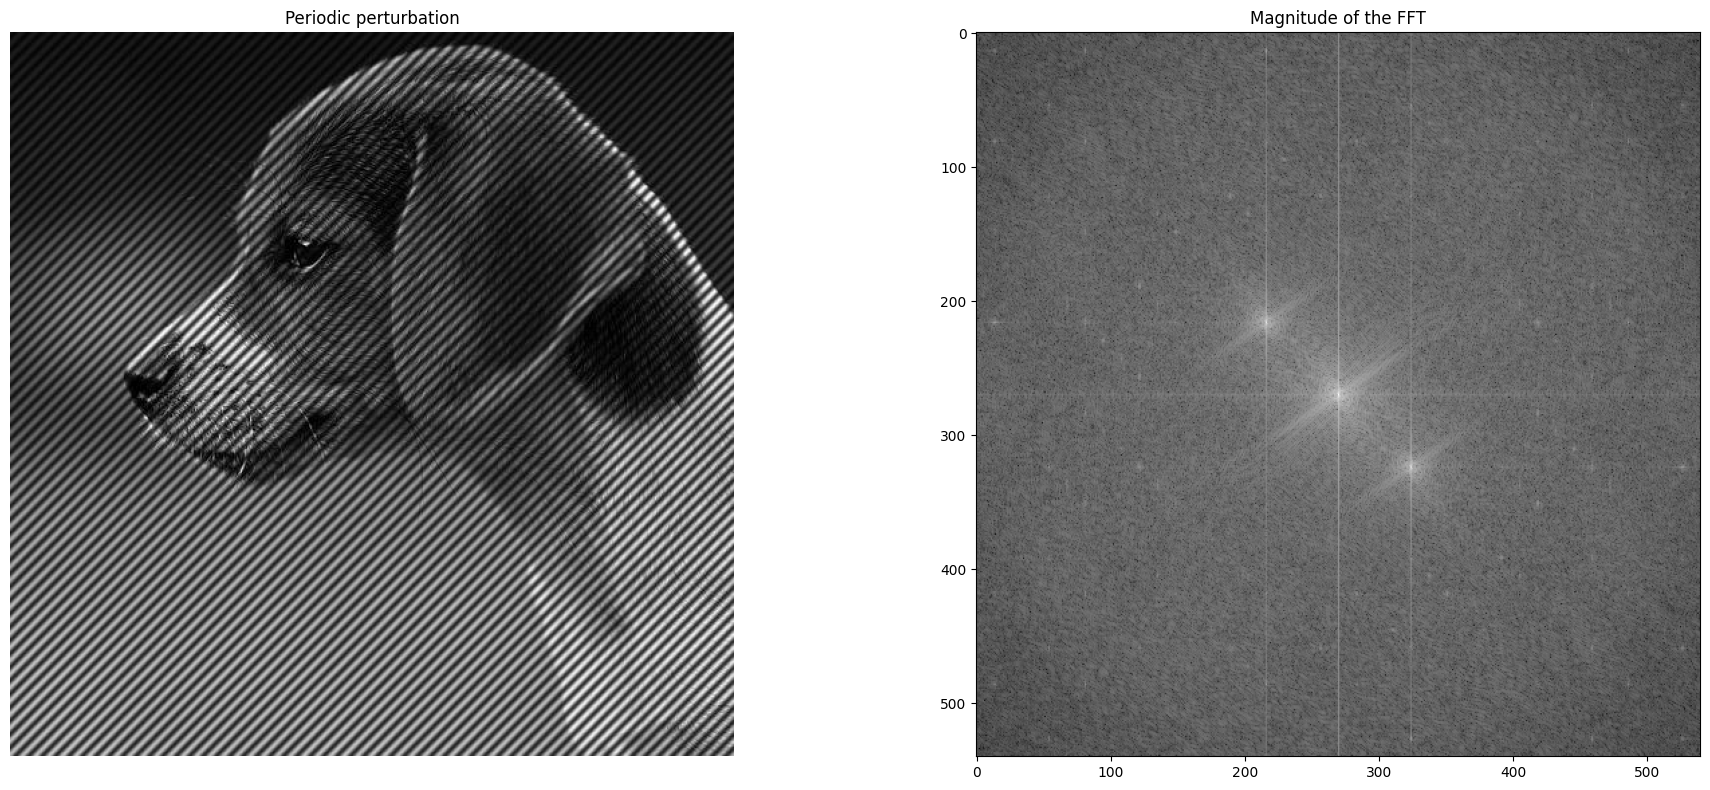

In [10]:
from scipy import fftpack

# read noisy image 'test_periodic_noise.jpg' and compute its Fourier transform (see Assignment #3)
periodic = io.imread('test_periodic_noise.jpg')
periodic_fft = fftpack.fftshift(fftpack.fft2(periodic))

# display the noisy image and the magnitude of its Fourier transform in the same figure
fig, ax = plt.subplots(1, 2)
ax[0].imshow(periodic, vmin=0, vmax=255, cmap=plt.get_cmap('gray'))
ax[0].set_title('Periodic perturbation')
ax[0].axis('off')
ax[1].imshow(np.log(np.abs(periodic_fft)+1), cmap=plt.get_cmap('gray'))
ax[1].set_title('Magnitude of the FFT')
fig.tight_layout()

The image `test_periodic_noise.jpg` contains a periodic, i.e. sinusoidal, perturbation (see e.g. Section 5.2.3 in course book). You task is to remove the noise as well as you can. In practice, this consists of two main steps 1) locating the noise in the frequency domain, and 2) filtering the perturbation frequency using a proper filter.

Let's take first a look at what a 2D sinusoidal signal looks like in the 2D Fourier space by plotting three signals with different frequencies, `f=2`, `f=4` and `f=8` and their Fourier transforms (FT):

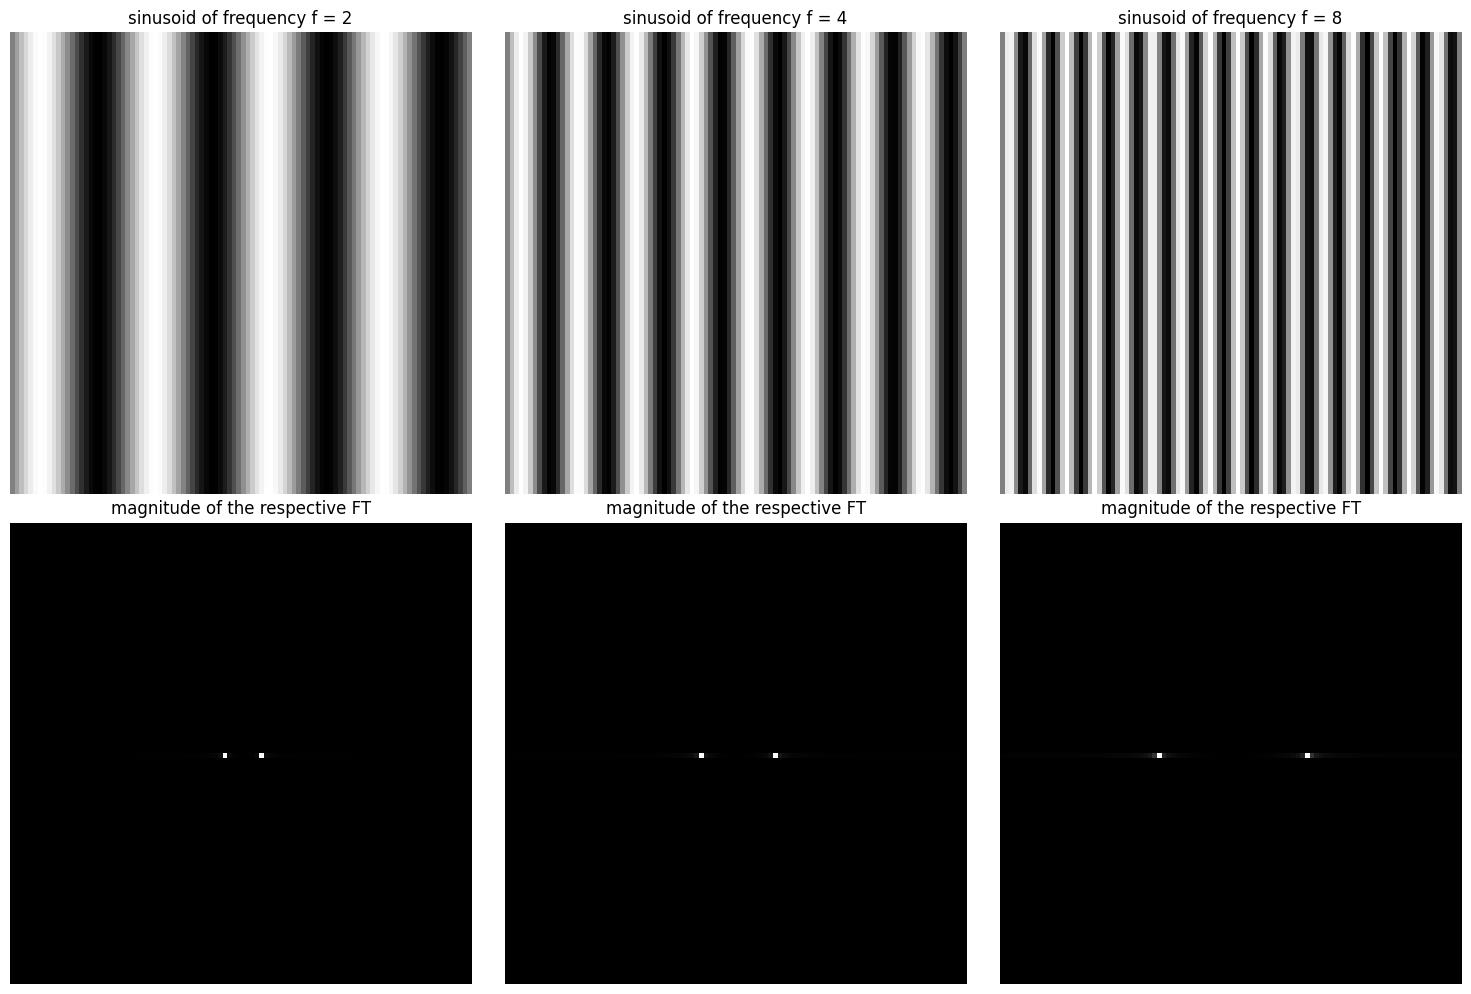

In [11]:
# sample (x,y) image coordinate space linearly
nx = 100; ny = 100
x = np.linspace(-1, 1, nx)
y = np.linspace(-1, 1, ny)
[X, Y] = np.meshgrid(x, y)

# plot the three 2D sinusoids and the magnitudes of their FTs
fig, ax = plt.subplots(2, 3, figsize=(15,10))

f = 2;                 
z = np.sin(2*np.pi*f*X)
ax[0,0].imshow(z, cmap=plt.get_cmap('gray'))
ax[0,0].axis('off')
ax[0,0].set_title('sinusoid of frequency f = 2')

Z = fftpack.fftshift(fftpack.fft2(z))
ax[1,0].imshow((np.abs(Z)+1), cmap=plt.get_cmap('gray'))
ax[1,0].axis('off')
ax[1,0].set_title('magnitude of the respective FT')

f = 4;                 
z = np.sin(2*np.pi*f*X)
ax[0,1].imshow(z, cmap=plt.get_cmap('gray'))
ax[0,1].axis('off')
ax[0,1].set_title('sinusoid of frequency f = 4')

Z = fftpack.fftshift(fftpack.fft2(z))
ax[1,1].imshow((np.abs(Z)+1), cmap=plt.get_cmap('gray'))
ax[1,1].axis('off')
ax[1,1].set_title('magnitude of the respective FT')

f = 8;                 
z = np.sin(2*np.pi*f*X)
ax[0,2].imshow(z, cmap=plt.get_cmap('gray'))
ax[0,2].axis('off')
ax[0,2].set_title('sinusoid of frequency f = 8')

Z = fftpack.fftshift(fftpack.fft2(z))
ax[1,2].imshow((np.abs(Z)+1), cmap=plt.get_cmap('gray'))
ax[1,2].axis('off')
ax[1,2].set_title('magnitude of the respective FT')
fig.tight_layout()

As you can see, a horizontal 2D sinusoid corresponds to two horizontal peaks symmetric to the zero frequency in the magnitude of the Fourier domain and the higher the frequency the further away these peaks are from the origo.

Now, let's take a look at what happens if we rotate the horizontal 2D sinusoid 15, 45 and 75 degrees:

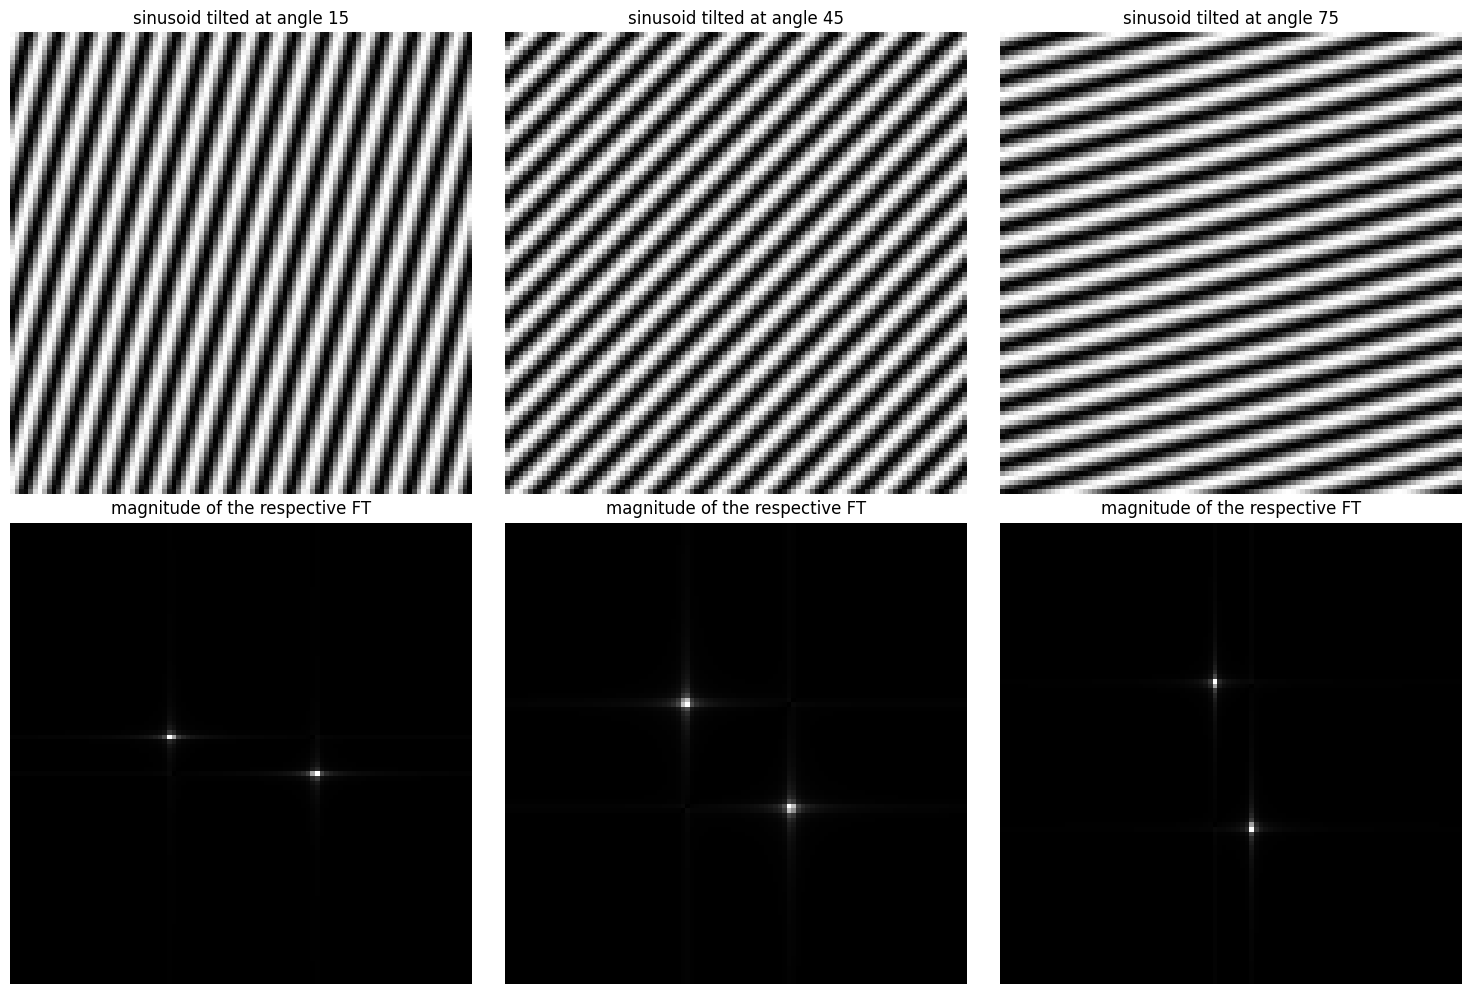

In [12]:
# plot rotated 2D sinusoids and the magnitudes of their FTs
fig, ax = plt.subplots(2, 3, figsize=(15,10))

theta = 15*np.pi/180;
z = np.sin(2*np.pi*f*(Y*np.sin(theta) + X*np.cos(theta)));
ax[0,0].imshow(z, cmap=plt.get_cmap('gray'))
ax[0,0].axis('off')
ax[0,0].set_title('sinusoid tilted at angle 15')

Z = fftpack.fftshift(fftpack.fft2(z))
ax[1,0].imshow((np.abs(Z)+1), cmap=plt.get_cmap('gray'))
ax[1,0].axis('off')
ax[1,0].set_title('magnitude of the respective FT')

theta = 45*np.pi/180;
z = np.sin(2*np.pi*f*(Y*np.sin(theta) + X*np.cos(theta)));
ax[0,1].imshow(z, cmap=plt.get_cmap('gray'))
ax[0,1].axis('off')
ax[0,1].set_title('sinusoid tilted at angle 45')

Z = fftpack.fftshift(fftpack.fft2(z))
ax[1,1].imshow((np.abs(Z)+1), cmap=plt.get_cmap('gray'))
ax[1,1].axis('off')
ax[1,1].set_title('magnitude of the respective FT')

theta = 75*np.pi/180;
z = np.sin(2*np.pi*f*(Y*np.sin(theta) + X*np.cos(theta)));
ax[0,2].imshow(z, cmap=plt.get_cmap('gray'))
ax[0,2].axis('off')
ax[0,2].set_title('sinusoid tilted at angle 75')

Z = fftpack.fftshift(fftpack.fft2(z))
ax[1,2].imshow((np.abs(Z)+1), cmap=plt.get_cmap('gray'))
ax[1,2].axis('off')
ax[1,2].set_title('magnitude of the respective FT')
fig.tight_layout()

Due to the properties of the 2D FT, the corresponding frequency peaks rotate exactly the same manner.

Now, it should be clear(er) what the periodic perturbation we are dealing with looks like in the FT of the noisy image, i.e. where to look for it. Can you now spot the reason for the periodic perturbation in the spectral image of the image `test_periodic_noise.jpg`?

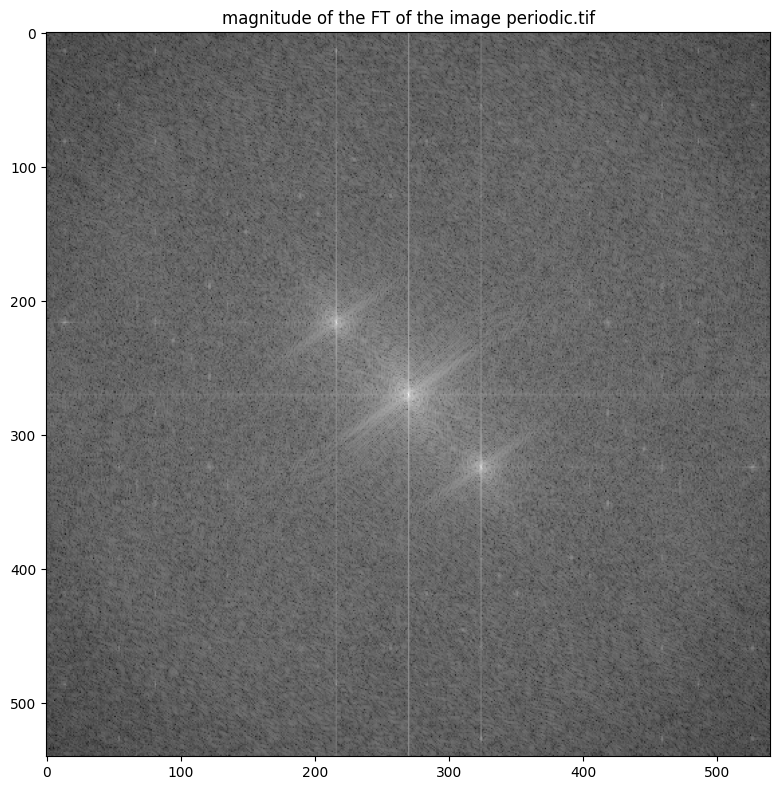

In [13]:
# display the magnitude of the FT
fig, ax = plt.subplots()
ax.imshow(np.log(np.abs(periodic_fft)+1), cmap=plt.get_cmap('gray'))
ax.set_title('magnitude of the FT of the image periodic.tif')
fig.tight_layout()

This kind of periodic perturbation should be filtered with a notch filter. However, in the following, an ideal band-reject filter is used for the sake of simplicity. So perform the following operations in the reserved code cells in order to remove the periodic perturbation from the test image.

(Please note that you can also implement a notch filter instead if you prefer.)

**2.1. Modify the ideal lowpass (or highpass) filter code from Assignment \#3 to construct an ideal band-reject filter `Hbr` and display band-reject filters with cut-off frequency `D0=0.2` and bandwidths `W=0.05` and `W=0.01` in the same figure.**

Hint: See lecture notes or course book what an ideal band-reject filter looks like. An ideal band-reject filter is just a combination of lowpass and highpass filtering, so now you need to combine the conditions `<` and `>` into one filter in order to reject frequencies within the narrow band.

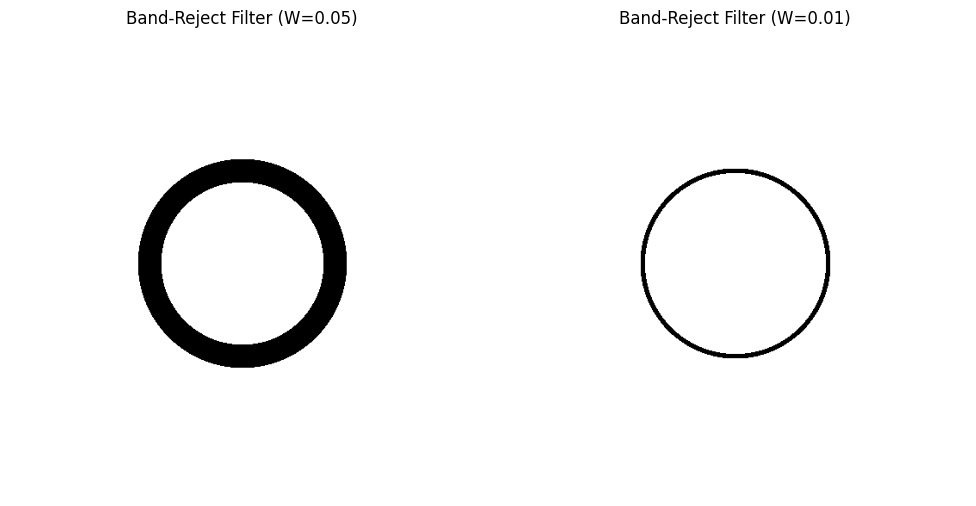

In [18]:
# create matrix D with absolute frequency values and size of the FT of the image 'test_periodic_noise.jpg' 
rows, cols = periodic_fft.shape  # Use the shape of the FT of the noisy image

# Create a grid of frequency coordinates
u = np.linspace(-0.5, 0.5, cols)
v = np.linspace(-0.5, 0.5, rows)
U, V = np.meshgrid(u, v)
# Compute the radial distance matrix D
D = np.sqrt(U**2 + V**2)


# set cut-off frequency 'D0' to 0.2
D0 = 0.2

# set the bandwidth 'W' to 0.05
W = 0.05

# W_values = [0.05, 0.01]  # Bandwidths

# initialize filter matrix 'Hbr' with ones (same size as the fft2 of the test image)
Hbr = np.ones_like(D)


# set frequencies > or < the threshold to zero, other remain unaltered
Hbr[(D >= D0 - W/2) & (D <= D0 + W/2)] = 0

# do the same to construct ideal band-reject filter with 'W' of 0.01
# Set the bandwidth 'W' to 0.01
W = 0.01
# Initialize filter matrix 'Hbr' with ones (same size as the fft2 of the test image)
Hbr_narrow = np.ones_like(D)
# Set frequencies > or < the threshold to zero, others remain unaltered
Hbr_narrow[(D >= D0 - W/2) & (D <= D0 + W/2)] = 0

# display both filters with different bandwidths in the same figure
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Display filter with W=0.05
ax[0].imshow(Hbr, cmap='gray')
ax[0].set_title('Band-Reject Filter (W=0.05)')
ax[0].axis('off')

# Display filter with W=0.01
ax[1].imshow(Hbr_narrow, cmap='gray')
ax[1].set_title('Band-Reject Filter (W=0.01)')
ax[1].axis('off')

plt.tight_layout()
plt.show()



**2.2. Find the perturbation frequency in the magnitude of the FT that should be filtered out and filter the noisy image with a band-reject filter having proper `D0` and `W`. Then. display the reconstructed filtered image and the magnitude of its FT in the same figure.**

Hint: You should see two sharp peaks in the spectral image which should be filtered out. They are somewhat hard to spot but you should know where to look if you followed the introduction part of this assignment carefully. You can either try to determine the perturbation frequency: 

1. manually by trial and error, or 

2. automatically by finding the peak coordinates with __[`skimage.feature.peak_local_max()`](http://scikit-image.org/docs/dev/api/skimage.feature.html#skimage.feature.peak_local_max)__ function and picking the corresponding relative frequency from the frequency matrix `D` based on the found peak locations.

Please note that you will receive the same amount of points no matter which of the two approaches you choose!

Perturbation frequency (D0): 0.0013


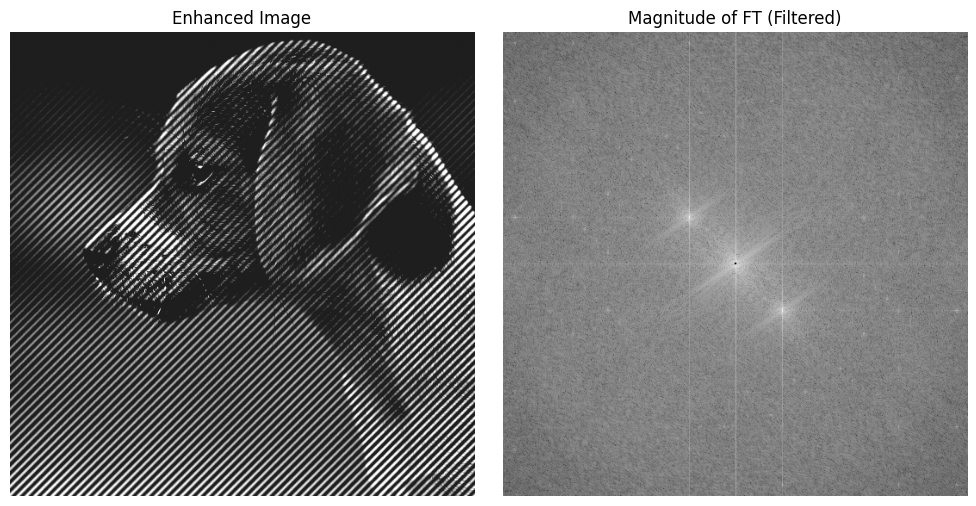

In [ ]:
from skimage.feature import peak_local_max
from skimage.metrics import structural_similarity as ssim
# from skimage.transform import resize


# Load the images
periodic = plt.imread('test_periodic_noise.jpg').astype('float32')
orig = plt.imread('test_noiseless.jpg').astype('float32')

# Resize the noisy image to match the dimensions of the original image
# periodic_resized = resize(periodic, orig.shape, anti_aliasing=True, preserve_range=True).astype('float32')

# Compute the Fourier Transform (FT) of the noisy image
periodic_fft = np.fft.fftshift(np.fft.fft2(periodic))

# Compute the magnitude of the FT
magnitude = np.abs(periodic_fft)

# Visualize the magnitude of the Fourier Transform to verify peaks
# plt.imshow(np.log(magnitude + 1), cmap='gray')
# plt.title('Magnitude of FT (Original)')
# plt.show()

# Find local maxima (peaks) in the magnitude using peak_local_max
peaks = peak_local_max(magnitude, min_distance=10, threshold_rel=0.5)

# Extract the coordinates of the two strongest peaks
peak_coords = peaks[:2]  # Assuming there are two dominant peaks

# Convert peak coordinates to relative frequencies using the frequency matrix D
rows, cols = periodic.shape
u = np.linspace(-0.5, 0.5, cols)
v = np.linspace(-0.5, 0.5, rows)
U, V = np.meshgrid(u, v)
D = np.sqrt(U**2 + V**2)

D0_values = [D[coord[0], coord[1]] for coord in peak_coords]

# Select the largest frequency as the perturbation frequency
D0 = max(D0_values)
print(f"Perturbation frequency (D0): {D0:.4f}")

# bandwidth 'W' to a narrow value
W = 0.005  # Narrow bandwidth to avoid over-filtering

# Initialize the Gaussian band-reject filter
sigma = 0.002  # Width of the Gaussian transition
Hbr = 1 - np.exp(-((D - D0)**2) / (2 * sigma**2))

# Apply the Gaussian band-reject filter to the FFT of the test image
filtered_fft = periodic_fft * Hbr

# Reconstruct the enhanced image
enhanced_image = np.fft.ifft2(np.fft.ifftshift(filtered_fft)).real

# Ensuring pixel values are in the valid range [0, 255]
enhanced_image = np.clip(enhanced_image, 0, 255).astype('uint8')

# Brightness and contrast adjustment
gain_factor = 2.0
bias = 30
enhanced_image = np.clip(enhanced_image * gain_factor + bias, 0, 255).astype('uint8')


# Display the enhanced image and the magnitude of its FT
filtered_magnitude = np.abs(filtered_fft)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(enhanced_image, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Enhanced Image')
ax[0].axis('off')

ax[1].imshow(np.log(filtered_magnitude + 1), cmap='gray')
ax[1].set_title('Magnitude of FT (Filtered)')
ax[1].axis('off')

plt.tight_layout()
plt.show()

# Resize noisy and enhanced images to match the dimensions of the original image
# periodic_resized = resize(periodic, orig.shape, anti_aliasing=True, preserve_range=True).astype('int32')
# enhanced_resized = resize(enhanced_image, orig.shape, anti_aliasing=True, preserve_range=True).astype('int32')

# # Compute quantitative metrics
# def compute_rmse(img1, img2):
#     return np.sqrt(np.mean((img1 - img2) ** 2))

# def compute_psnr(img1, img2):
#     mse = np.mean((img1 - img2) ** 2)
#     if mse == 0:
#         return float('inf')
#     max_pixel = 255.0
#     psnr = 10 * np.log10((max_pixel ** 2) / mse)
#     return psnr

# rmse_noisy = compute_rmse(orig, periodic_resized)
# rmse_enhanced = compute_rmse(orig, enhanced_resized)

# psnr_noisy = compute_psnr(orig, periodic_resized)
# psnr_enhanced = compute_psnr(orig, enhanced_resized)

# ssim_noisy = ssim(orig, periodic_resized, data_range=255)
# ssim_enhanced = ssim(orig, enhanced_resized, data_range=255)

# print(f"RMSE (Noisy Image): {rmse_noisy:.2f}")
# print(f"RMSE (Enhanced Image): {rmse_enhanced:.2f}")
# print(f"PSNR (Noisy Image): {psnr_noisy:.2f} dB")
# print(f"PSNR (Enhanced Image): {psnr_enhanced:.2f} dB")
# print(f"SSIM (Noisy Image): {ssim_noisy:.4f}")
# print(f"SSIM (Enhanced Image): {ssim_enhanced:.4f}")

**2.3. Finally, display the noisy image `test_periodic_noise.jpg` and the enhanced image in the same figure.**

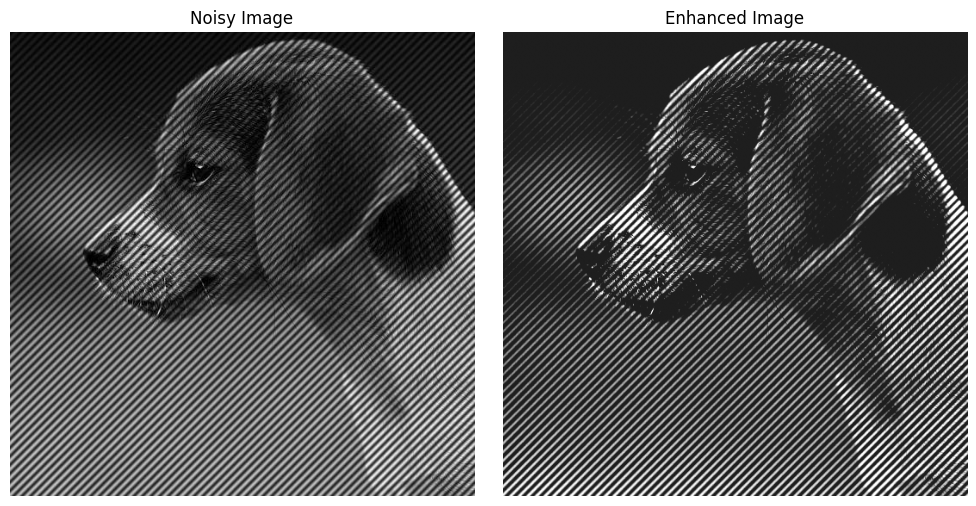

In [46]:
# display noisy and "restored" image
# Display the noisy image and the enhanced image in the same figure
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Display the noisy image
ax[0].imshow(periodic, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Noisy Image')
ax[0].axis('off')

# Display the enhanced image
ax[1].imshow(enhanced_image, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Enhanced Image')
ax[1].axis('off')

plt.tight_layout()
plt.show()




# 3. Color Image Processing

The objective in this task is to work with color images. We will look at various color models, transform one model into another, and perform pixel-level operations on color images. The material required for these tasks can be obtained from the Chapter 6 of the lecture notes in Moodle, as well as from the Chapter 6 of the textbook on Digital Image Processing.

**3.1. Read the `fruits.jpg` image. Note, that the image is loaded in the RGB color model here. Your first task is to extract the R, G and B components. Display all the three components as separate images, in the same figure.**

Shape of the image: (1080, 1920, 3)


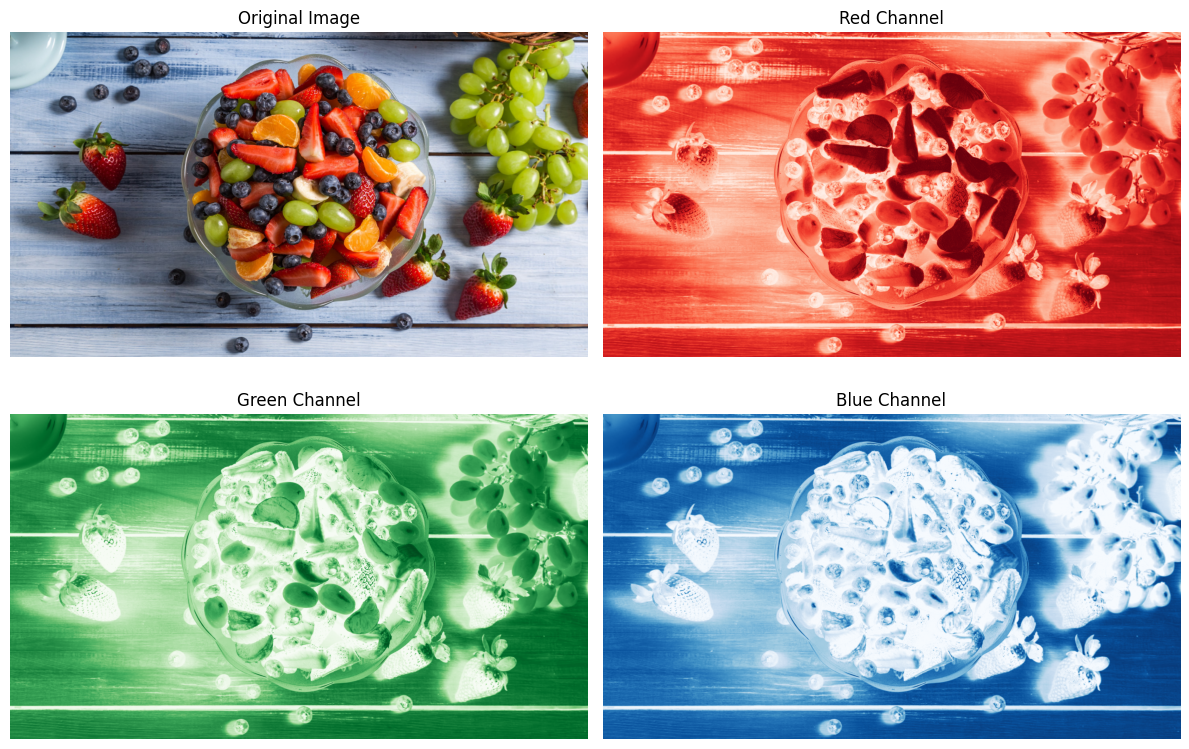

In [69]:
import matplotlib.image as mpimg
# read image the original 'fruits.jpg' 
fruits = mpimg.imread('fruits.jpg')

# Note the shape of the Numpy array `fruits`
print("Shape of the image:", fruits.shape)
# Extract R, G and B components from fruits
red_channel = fruits[:, :, 0]  # Extract Red channel
green_channel = fruits[:, :, 1]  # Extract Green channel
blue_channel = fruits[:, :, 2]  # Extract Blue channel
# Display the three components and the original image in the same figure
plt.figure(figsize=(12, 8))
# Original image
plt.subplot(2, 2, 1)
plt.imshow(fruits)
plt.title("Original Image")
plt.axis('off')

# Red channel
plt.subplot(2, 2, 2)
plt.imshow(red_channel, cmap='Reds')
plt.title("Red Channel")
plt.axis('off')

# Green channel
plt.subplot(2, 2, 3)
plt.imshow(green_channel, cmap='Greens')
plt.title("Green Channel")
plt.axis('off')

# Blue channel
plt.subplot(2, 2, 4)
plt.imshow(blue_channel, cmap='Blues')
plt.title("Blue Channel")
plt.axis('off')

# Show the plot
plt.tight_layout()
plt.show()


In this task, we will work with the two color models, viz., the **RGB** and the **HSI** models. The **RGB** model stands for Red ($R$), Green ($G$), Blue ($B$), where, each image pixel value is assigned the tuple ($R,G,B$). The **HSI** model stands for Hue ($H$), Saturation ($S$), Intensity ($I$), where each pixel value is specified as a tuple ($H, S, I$). The formula for converting **RGB** --> **HSI** is given in the textbook (see Chapter 6). The equations for computing $H$, $S$ and $I$ values for a pixel from its $R$, $G$ and $B$ values are given below

$H = \left\{\begin{matrix}
  \theta, \ B <= G \\ 
  360 - \theta, \ B > G \end{matrix}\right.$ where $\theta = \text{cos}^{-1} \left( \dfrac{\dfrac{1}{2} \left( (R-G) + (R-B) \right)}{[(R-G)^2 + (R-B)(G-B)]^{\dfrac{1}{2}}} \right)$

$S = 1 - \dfrac{3}{(R + G + B)}[\text{min}(R,G,B)]$,


$I = \dfrac{1}{3} (R + G + B)$

Note, that the $R$, $G$ and $B$ values have to be normalized and in the range $[0, 1]$.

**3.2. Now, write a code to compute Hue $H$, Saturation $S$ and Intensity $I$ for each pixel in the image colors.png.**
Hint: You will need to add a *very* small number such as $0.01$ to the denominator $R+G+B$ in computation for $S$, otherwise you will end up dividing by $0$ leading to warning.

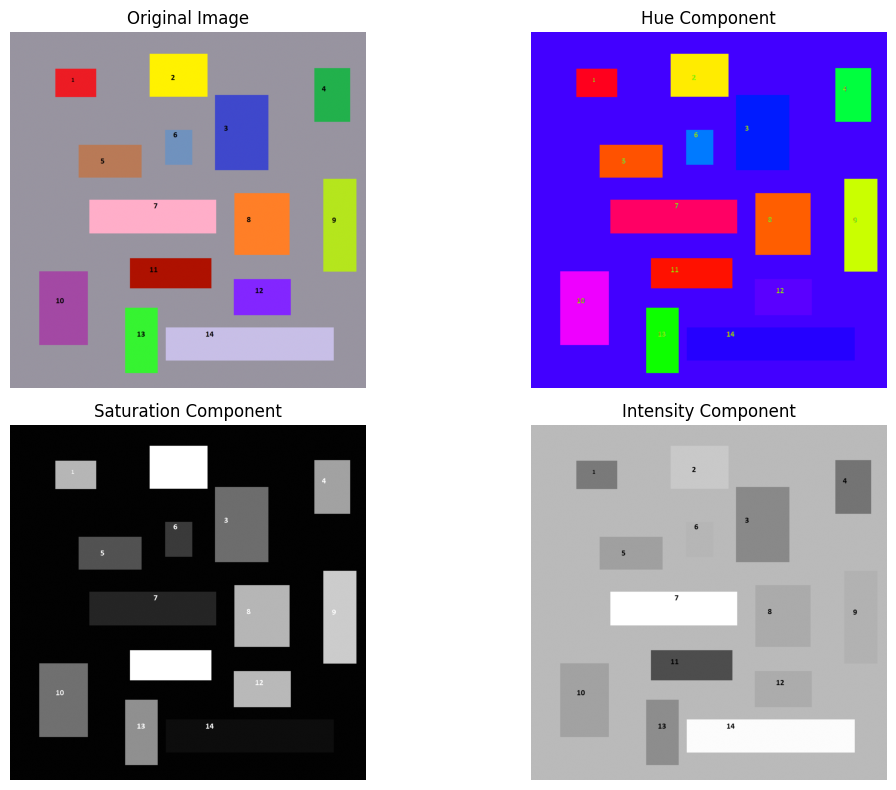

In [70]:
colors = io.imread('colors.png')
colors = colors / 255.0  # Normalize pixel values to [0, 1]

# Extract R, G, B channels
R = colors[:, :, 0]
G = colors[:, :, 1]
B = colors[:, :, 2]

# Compute the Hue for each pixel
numerator = 0.5 * ((R - G) + (R - B))
denominator = np.sqrt((R - G)**2 + (R - B) * (G - B)) + 1e-6  # Add epsilon to avoid division by zero
theta = np.arccos(numerator / denominator)  # In radians
theta = np.degrees(theta)  # Convert to degrees

# Determine H based on the condition B <= G or B > G
H = np.where(B <= G, theta, 360 - theta)


# Compute the saturation for each pixel
min_RGB = np.minimum(np.minimum(R, G), B)  # Element-wise minimum of R, G, B
S = 1 - (3 / (R + G + B + 0.01)) * min_RGB  # Add 0.01 to avoid division by zero


# Compute the Intensity for each pixel
I = (R + G + B) / 3

# Display the three components and the original image in the same figure
plt.figure(figsize=(12, 8))

# Original image
plt.subplot(2, 2, 1)
plt.imshow(colors)
plt.title("Original Image")
plt.axis('off')

# Hue component
plt.subplot(2, 2, 2)
plt.imshow(H, cmap='hsv')  # Use 'hsv' colormap for Hue
plt.title("Hue Component")
plt.axis('off')

# Saturation component
plt.subplot(2, 2, 3)
plt.imshow(S, cmap='gray')  # Use grayscale colormap for Saturation
plt.title("Saturation Component")
plt.axis('off')

# Intensity component
plt.subplot(2, 2, 4)
plt.imshow(I, cmap='gray')  # Use grayscale colormap for Intensity
plt.title("Intensity Component")
plt.axis('off')

# Show the plot
plt.tight_layout()
plt.show()


# Aftermath
Finally, fill your answers to the following questions:

**How much time did you need to complete this exercise?**

`6-7 hours `

**Did you experience any problems with the exercise? Was there enough help available? Should this notebook be more (or less) detailed?**

`part 1 was easy but in part it was difficult and time taking to enhance the image by adjusting the W and D values repeatedly and tryiing to get the better values of metrics by execuitng iterations over ad over`

# References
`https://c3.ai/glossary/data-science/root-mean-square-error-rmse/#:~:text=To%20compute%20RMSE%2C%20calculate%20the,square%20root%20of%20that%20mean. https://www.researchgate.net/figure/Comparison-of-Wiener-Filter-and-Median-Filter_fig7_332574579 https://peterbbryan.medium.com/understanding-2d-fourier-space-59808b644a13 https://www.imageeprocessing.com/2013/05/converting-rgb-image-to-hsi.html`

# Submission

1. Before submitting your work, **check that your notebook (code) runs from scratch** and reproduces all the requested results by clicking on the menu `Kernel -> Restart & Run All`! Also, check that you have answered all the questions written in **bold**.
2. Clear all outputs and variables, etc. by click on the menu `Kernel -> Restart & Clear Output`. This may (or will) reduce the file size of your deliverable a lot! 
3. Rename this Jupyter notebook to **`DIP_PA4_[student number(s)].ipynb`** (e.g. `DIP_PA4_1234567.ipynb` if solo work or `DIP_PA4_1234567-7654321.ipynb` if pair work)